In [1]:
# Loading required libraries

import numpy as np
import pandas as pd
import re

In [2]:
laptop = pd.read_csv(r"\Users\LENOVO\Downloads\laptop_details.csv")

In [3]:
laptop.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [4]:
laptop.shape

(720, 4)

In [5]:
laptop.tail()

,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


# Extracting the Details using Regex

In [6]:
laptop.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [7]:
print(laptop['Feature'][0])
print(laptop['Feature'][2])
print(laptop['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


In [8]:
po = re.compile('[A-Za-z0-9]+')
po.search(laptop.Product[0]).group()

'Lenovo'

In [9]:
# Brand Information

regex = r'^\w+'

laptop['Brand'] = laptop['Product'].apply(lambda x : re.findall(regex, x))
laptop.head()

,Product,Rating,MRP,Feature,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS]


In [10]:
# Processor Information

regex = r'(?:AMD|Intel|Apple|Qualcomm)[\s\w]+Processor'

laptop['Processor'] = laptop['Feature'].apply(lambda x : re.findall(regex, x))

In [11]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor]


In [12]:
po = re.compile('[0-9]+\sGB\s+')
po.search(laptop.Feature[0]).group()

'8 GB '

In [13]:
# RAM Information
laptop['RAM Size']=laptop['Feature'].apply(lambda x:re.compile('[0-9]+\sGB\s+').search(x).group())
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8 GB
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8 GB
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8 GB
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8 GB
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8 GB


In [14]:
laptop['RAM Size'].value_counts()

8 GB       401
16 GB      263
4 GB        37
32 GB       17
128 GB       2
Name: RAM Size, dtype: int64

In [15]:
laptop['RAM Size'] = laptop['RAM Size'].apply(lambda x : x.replace('GB', ''))

In [16]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8


In [17]:
po = re.compile('\sGB\s+[A-Z0-9]+')
po.search(laptop.Feature[0]).group()

' GB DDR4'

In [18]:
# RAM Type Information
laptop['RAM Type']=laptop['Feature'].apply(lambda x:re.compile('\sGB\s+[A-Za-z0-9]+').search(x).group())
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,GB DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,GB DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,GB DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,GB DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,GB DDR4


In [19]:
laptop['RAM Type']= laptop['RAM Type'].apply(lambda x : x.replace('GB', ''))

In [20]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4


In [21]:
laptop['RAM Type'].value_counts()

  DDR4       559
  DDR5        92
  LPDDR4X     37
  Unified     12
  LPDDR5       9
  LPDDR4       8
  SSD          2
  LPDDR3       1
Name: RAM Type, dtype: int64

In [22]:
po = re.compile('RAM[\sA-Za-z0-9]+Operating System')
po.search(laptop.Feature[0]).group()

'RAM64 bit Windows 11 Operating System'

In [23]:
# Operating System Information
laptop['Operating System']=laptop['Feature'].apply(lambda x:re.compile('RAM[\sA-Za-z0-9]+Operating System').search(x).group().replace("RAM",""))
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11 Operating System
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11 Operating System
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11 Operating System
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10 Operating System
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11 Operating System


In [24]:
laptop['Operating System'] = laptop['Operating System'].apply(lambda x : x.replace('Operating System',''))

In [25]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

laptop['Storage'] = laptop['Feature'].apply(lambda x : ''.join(re.findall(regex, x)))

In [26]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11,512 GB SSD


In [27]:
regex = r'(?:SSD[\s,]?|HDD[\s,]?)+'
laptop['Storage Type'] = laptop['Storage'].apply(lambda x: ','.join(re.findall(regex, x)))

In [28]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,256 GB SSD,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10,512 GB SSD,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11,512 GB SSD,SSD


In [29]:
laptop['Storage Type'].value_counts()

SSD            662
HDD,SSD         29
HDD             17
                10
SSD,HDD,SSD      2
Name: Storage Type, dtype: int64

In [30]:
laptop['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [31]:
regex = r'\d{2}\.\d{2}\s+'
laptop['Display'] = laptop['Feature'].apply(lambda x:''.join(re.findall(regex,x)).replace('cm',''))

In [32]:
laptop['Display'][0]

'35.56 '

In [33]:
laptop['Display']=laptop['Display'].apply(lambda x: x.strip("''"))

In [34]:
laptop['Display']

0      35.56 
1      39.62 
2      39.62 
3      39.62 
4      39.62 
        ...  
715    29.46 
716    39.62 
717    39.62 
718    35.56 
719    39.62 
Name: Display, Length: 720, dtype: object

In [35]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,256 GB SSD,SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD,SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB SSD,SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10,512 GB SSD,SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11,512 GB SSD,SSD,39.62


In [36]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Processor         720 non-null    object 
 6   RAM Size          720 non-null    object 
 7   RAM Type          720 non-null    object 
 8   Operating System  720 non-null    object 
 9   Storage           720 non-null    object 
 10  Storage Type      720 non-null    object 
 11  Display           720 non-null    object 
dtypes: float64(1), object(11)
memory usage: 67.6+ KB


In [37]:
laptop.Display.value_counts()

39.62     492
35.56     137
33.78      18
40.64      16
43.94      11
29.46       9
40.89       8
            6
41.15       5
34.04       5
35.81       4
34.54       3
36.07       2
33.02       1
14.96       1
34.29       1
42.16       1
Name: Display, dtype: int64

In [38]:
laptop['Display']=laptop['Display'].replace('',np.nan)

In [39]:
laptop['Display'].value_counts()

39.62     492
35.56     137
33.78      18
40.64      16
43.94      11
29.46       9
40.89       8
41.15       5
34.04       5
35.81       4
34.54       3
36.07       2
33.02       1
14.96       1
34.29       1
42.16       1
Name: Display, dtype: int64

In [40]:
laptop['Display'] = laptop['Display'].astype(float)

In [41]:
laptop.Storage = laptop.Storage.apply(lambda x: str(x).replace('SSD','').replace('HDD',''))
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,256 GB,SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10,512 GB,SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11,512 GB,SSD,39.62


In [42]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    object 
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Processor         720 non-null    object 
 6   RAM Size          720 non-null    object 
 7   RAM Type          720 non-null    object 
 8   Operating System  720 non-null    object 
 9   Storage           720 non-null    object 
 10  Storage Type      720 non-null    object 
 11  Display           714 non-null    float64
dtypes: float64(2), object(10)
memory usage: 67.6+ KB


# Cleaning the Data

In [43]:
#Missing values
laptop.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor             0
RAM Size              0
RAM Type              0
Operating System      0
Storage               0
Storage Type          0
Display               6
dtype: int64

In [44]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,256 GB,SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],8,DDR4,64 bit Windows 10,512 GB,SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],8,DDR4,Windows 11,512 GB,SSD,39.62


In [45]:
print(laptop['Storage'][0])

print(type(laptop['Storage'][0]))


256 GB 
<class 'str'>


In [46]:
print(''.join(laptop['Storage'][0]))
print(type(''.join(laptop['Storage'][0])))

256 GB 
<class 'str'>


In [47]:
laptop.Processor=laptop.Processor.apply(lambda x : ''.join(x))
laptop.Brand = laptop.Brand.apply(lambda x : ''.join(x))

In [48]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8,DDR4,64 bit Windows 11,256 GB,SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3 Processor,8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core Processor,8,DDR4,64 bit Windows 10,512 GB,SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5 Processor,8,DDR4,Windows 11,512 GB,SSD,39.62


In [49]:
laptop.Processor.value_counts()

Intel Core i5 Processor                               157
Intel Core i3 Processor                               133
AMD Ryzen 9 Octa Core Processor                        87
AMD Ryzen 7 Octa Core Processor                        80
Intel Core i7 Processor                                56
AMD Ryzen 5 Hexa Core Processor                        52
AMD Ryzen 3 Dual Core Processor                        43
AMD Ryzen 5 Quad Core Processor                        37
Intel Celeron Dual Core Processor                      20
Intel Core i9 Processor                                11
Apple M1 Processor                                      7
Apple M1 Pro Processor                                  6
Apple M2 Processor                                      5
AMD Ryzen 3 Quad Core Processor                         4
Intel Celeron Quad Core Processor                       3
Intel Pentium Silver Processor                          3
Intel Pentium Quad Core Processor                       3
Intel Evo Core

In [50]:
laptop.Processor = laptop.Processor.apply(lambda x : x.replace('Processor',''))

In [51]:
laptop.MRP = laptop.MRP.apply(lambda x : x.replace('₹', '').replace(',', ''))

In [52]:
laptop['MRP']=laptop['MRP'].apply(lambda x:float(x))
laptop['MRP']=laptop['MRP'].apply(lambda x:int(x))

In [53]:
laptop['RAM Size']=laptop['RAM Size'].apply(lambda x:float(x))
laptop['RAM Size']=laptop['RAM Size'].apply(lambda x:int(x))

In [54]:
laptop.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,8,DDR4,64 bit Windows 11,256 GB,SSD,35.56
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,8,DDR4,64 bit Windows 11,512 GB,SSD,39.62
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,8,DDR4,64 bit Windows 10,512 GB,SSD,39.62
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,8,DDR4,Windows 11,512 GB,SSD,39.62


In [55]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    int64  
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Processor         720 non-null    object 
 6   RAM Size          720 non-null    int64  
 7   RAM Type          720 non-null    object 
 8   Operating System  720 non-null    object 
 9   Storage           720 non-null    object 
 10  Storage Type      720 non-null    object 
 11  Display           714 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 67.6+ KB


In [56]:
laptop['Operating System'].value_counts()

64 bit Windows 11     404
Windows 11            156
64 bit Windows 10     117
Mac OS                 19
Windows 10             12
Chrome                  6
DOS                     2
64 bit DOS              2
32 bit Windows 11       1
64 bit Chrome           1
Name: Operating System, dtype: int64

In [57]:
laptop["Operating System"].replace("Windows 11 ","64 bit Windows 11",inplace=True)
laptop["Operating System"].replace("Windows 10 ","64 bit Windows 10",inplace=True)
laptop["Operating System"].replace("DOS ","64 bit DOS",inplace=True)
laptop["Operating System"].replace("Chrome ","64 bit Chrome",inplace=True)

In [58]:
laptop["Operating System"].value_counts()

64 bit Windows 11     404
64 bit Windows 11     156
64 bit Windows 10     117
Mac OS                 19
64 bit Windows 10      12
64 bit Chrome           6
64 bit DOS              2
64 bit DOS              2
32 bit Windows 11       1
64 bit Chrome           1
Name: Operating System, dtype: int64

In [59]:
laptop.Processor.isnull().sum()

0

In [60]:
laptop.Storage.value_counts()

512 GB                 375
1 TB                   193
256 GB                  98
1 TB 256 GB             26
                        10
2 TB                     7
128 GB                   6
1 TB 512 GB              2
128 GB 1 TB 128 GB       2
256 GB 256 GB            1
Name: Storage, dtype: int64

In [61]:
laptop.Storage.isnull().sum()

0

In [62]:
laptop.replace("",np.nan,inplace=True)

In [63]:
laptop.replace("np.nan",np.nan,inplace=True)

In [64]:
laptop.Storage.value_counts()

512 GB                 375
1 TB                   193
256 GB                  98
1 TB 256 GB             26
2 TB                     7
128 GB                   6
1 TB 512 GB              2
128 GB 1 TB 128 GB       2
256 GB 256 GB            1
Name: Storage, dtype: int64

In [65]:
laptop.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor             0
RAM Size              0
RAM Type              0
Operating System      0
Storage              10
Storage Type         10
Display               6
dtype: int64

In [66]:
laptop[laptop.Storage.isna()]

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Qualcomm Snapdragon 7c Gen 2,4,LPDDR4X,64 bit Windows 11,NaN,NaN,35.56
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel Celeron Dual Core,4,DDR4,64 bit Chrome,NaN,NaN,35.56
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Intel Celeron Dual Core,4,DDR4,64 bit Chrome,NaN,NaN,35.56
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,4,LPDDR4,64 bit Chrome,NaN,NaN,29.46
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,4,LPDDR4,64 bit Chrome,NaN,NaN,39.62
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel Celeron Dual Core,4,DDR4,64 bit Windows 11,NaN,NaN,29.46
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Intel Celeron Dual Core,4,DDR4,64 bit Windows 11,NaN,NaN,29.46
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Intel Celeron Dual Core,4,LPDDR4X,64 bit Chrome,NaN,NaN,29.46
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,4,LPDDR4,64 bit Chrome,NaN,NaN,35.56
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Intel Celeron Dual Core,4,LPDDR4,64 bit Chrome,NaN,NaN,29.46


In [67]:
laptop.Storage.fillna(laptop.Storage.mode()[0],inplace=True)

In [68]:
laptop.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor             0
RAM Size              0
RAM Type              0
Operating System      0
Storage               0
Storage Type         10
Display               6
dtype: int64

In [69]:
laptop[laptop['Display'].isna()]

,Product,Rating,MRP,Feature,Brand,Processor,RAM Size,RAM Type,Operating System,Storage,Storage Type,Display
142,DELL Vostro Ryzen 3 Dual Core R3-3250U - (8 GB...,3.8,33099,Processor: AMD Ryzen 3-3250U (2.60 GHz up to 3...,DELL,AMD Ryzen 3 Dual Core,8,DDR4,64 bit Windows 11,1 TB,HDD,NaN
349,DELL Vostro Core i5 11th Gen - (8 GB/512 GB SS...,3.9,63090,Processor: 11th Generation Intel Core i5-1135G...,DELL,Intel Core i5,8,DDR4,64 bit Windows 10,512 GB,SSD,NaN
378,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,NaN,37000,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,8,DDR4,64 bit Windows 11,256 GB,SSD,NaN
384,Lenovo Core i3 11th Gen - (4 GB/256 GB SSD/Win...,4.3,38990,Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,Lenovo,Intel Core i3,4,DDR4,64 bit Windows 10,256 GB,SSD,NaN
598,DELL Core i3 11th Gen - (8 GB/1 TB HDD/256 GB ...,NaN,46900,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,DELL,Intel Core i3,8,DDR4,64 bit Windows 11,1 TB 256 GB,"HDD,SSD",NaN
618,DELL Inspiron Core i3 10th Gen - (4 GB/256 GB ...,4.4,39890,Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...,DELL,Intel Core i3,4,DDR4,64 bit Windows 10,256 GB,SSD,NaN


In [70]:
laptop['Display'].median()

39.62

In [71]:
laptop['Display'].fillna(laptop['Display'].median(),inplace=True)

In [72]:
laptop.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor             0
RAM Size              0
RAM Type              0
Operating System      0
Storage               0
Storage Type         10
Display               0
dtype: int64

In [73]:
laptop['Storage Type'].fillna(laptop['Storage Type'].mode()[0],inplace=True)

In [74]:
laptop.Rating.fillna(laptop.Rating.median(),inplace=True)

In [75]:
laptop.isnull().sum()

Product             0
Rating              0
MRP                 0
Feature             0
Brand               0
Processor           0
RAM Size            0
RAM Type            0
Operating System    0
Storage             0
Storage Type        0
Display             0
dtype: int64

In [76]:
laptop.duplicated().sum()

297

In [77]:
laptop.drop_duplicates(inplace=True)

In [78]:
laptop.duplicated().sum()

0

In [79]:
laptop.shape

(423, 12)

In [80]:
list=['Brand','Processor','Operating System','Rating','RAM Size','RAM Type','Storage','Storage Type','Display','MRP']
Flipkart=laptop.reindex(columns=list)
Flipkart

,Brand,Processor,Operating System,Rating,RAM Size,RAM Type,Storage,Storage Type,Display,MRP
0,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,256 GB,SSD,35.56,36990
1,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,512 GB,SSD,39.62,39990
2,ASUS,Intel Core i3,64 bit Windows 11,4.3,8,DDR4,512 GB,SSD,39.62,32990
3,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,4.4,8,DDR4,512 GB,SSD,39.62,49990
4,ASUS,Intel Core i5,64 bit Windows 11,4.4,8,DDR4,512 GB,SSD,39.62,49990
...,...,...,...,...,...,...,...,...,...,...
713,DELL,Intel Core i5,64 bit Windows 11,4.3,16,DDR5,512 GB,SSD,33.78,76590
714,HP,AMD Ryzen 7 Octa Core,64 bit Windows 10,4.6,16,DDR4,512 GB,SSD,39.62,90000
715,ASUS,Intel Celeron Dual Core,64 bit Chrome,4.0,4,LPDDR4,512 GB,SSD,29.46,23490
718,ASUS,Intel Core i7,64 bit Windows 11,3.0,16,LPDDR5,512 GB,SSD,35.56,125990


In [81]:
Flipkart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             423 non-null    object 
 1   Processor         423 non-null    object 
 2   Operating System  423 non-null    object 
 3   Rating            423 non-null    float64
 4   RAM Size          423 non-null    int64  
 5   RAM Type          423 non-null    object 
 6   Storage           423 non-null    object 
 7   Storage Type      423 non-null    object 
 8   Display           423 non-null    float64
 9   MRP               423 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 36.4+ KB


In [82]:
df = pd.DataFrame(Flipkart)

# convert the DataFrame to a CSV file
df.to_csv('flipkart.csv', index=False)

In [83]:
!pip install openpyxl
import openpyxl
# convert the DataFrame to an Excel file
df.to_excel('flipkart.xlsx', index=False)

You should consider upgrading via the 'C:\python\python.exe -m pip install --upgrade pip' command.


In [84]:
from IPython.display import FileLink
FileLink('flipkart.xlsx')


C:\Users\LENOVO\Videos\MACHINE LEARNING\flipkart.xlsx

# Data Visualization

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
Flipkart.head()

,Brand,Processor,Operating System,Rating,RAM Size,RAM Type,Storage,Storage Type,Display,MRP
0,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,256 GB,SSD,35.56,36990
1,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,512 GB,SSD,39.62,39990
2,ASUS,Intel Core i3,64 bit Windows 11,4.3,8,DDR4,512 GB,SSD,39.62,32990
3,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,4.4,8,DDR4,512 GB,SSD,39.62,49990
4,ASUS,Intel Core i5,64 bit Windows 11,4.4,8,DDR4,512 GB,SSD,39.62,49990


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\431563311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flipkart.MRP)


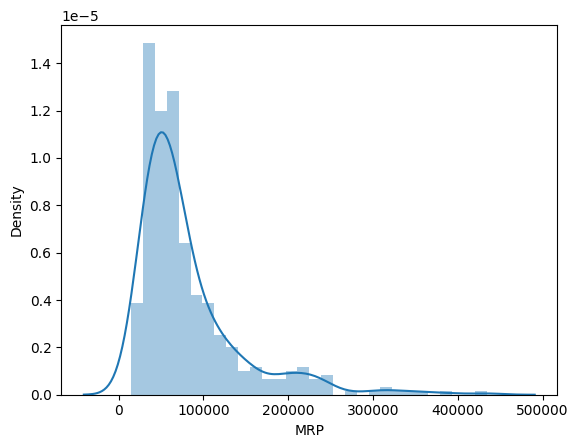

In [87]:
sns.distplot(Flipkart.MRP)
plt.show()

<Axes: xlabel='MRP'>

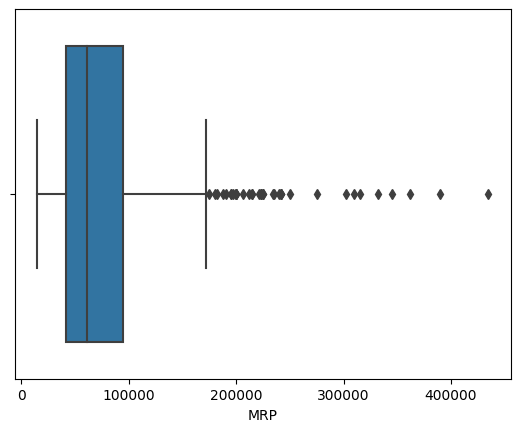

In [88]:
#Checking Outliers
sns.boxplot(data=Flipkart,x='MRP')

<Axes: xlabel='Rating'>

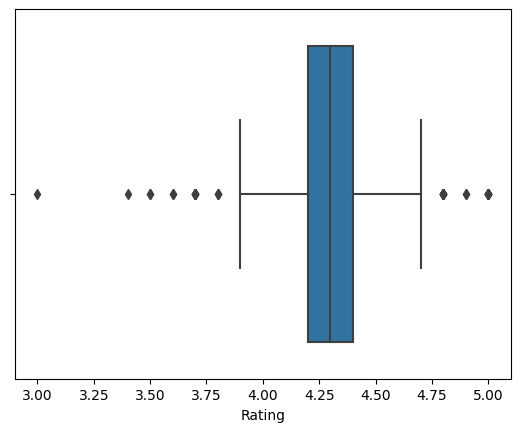

In [89]:
sns.boxplot(data=Flipkart,x='Rating')

In [90]:
from scipy import stats

In [91]:
#By using Boxcox we treat the outliers
Flipkart['Mrp'],lamda=stats.boxcox(Flipkart.MRP)

In [92]:
Flipkart['Mrp']

0      2.966419
1      2.968910
2      2.962647
3      2.975699
4      2.975699
         ...   
713    2.987378
714    2.991388
715    2.950586
718    2.999100
719    2.976278
Name: Mrp, Length: 423, dtype: float64

<Axes: xlabel='Mrp'>

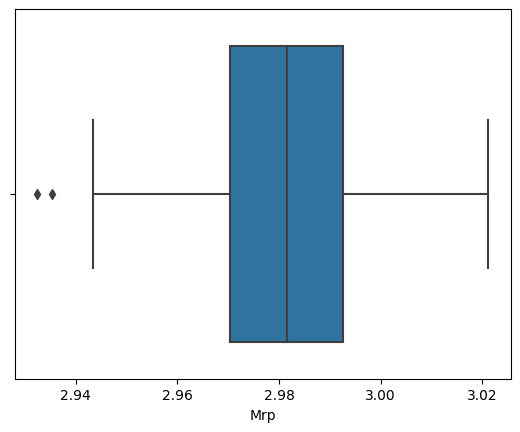

In [93]:
sns.boxplot(data=Flipkart,x='Mrp')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\1559262380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Flipkart.Mrp)


<Axes: xlabel='Mrp', ylabel='Density'>

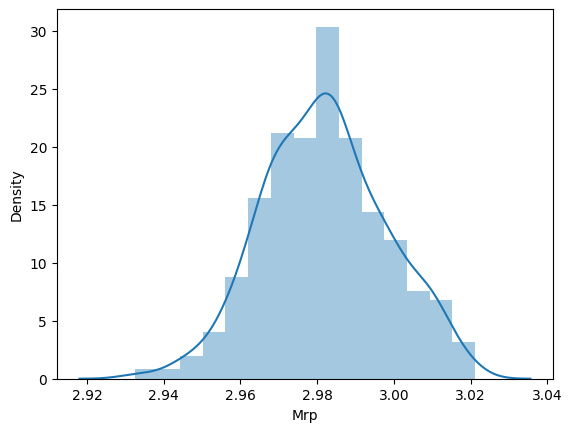

In [94]:
sns.distplot(Flipkart.Mrp)

<Axes: xlabel='Brand', ylabel='count'>

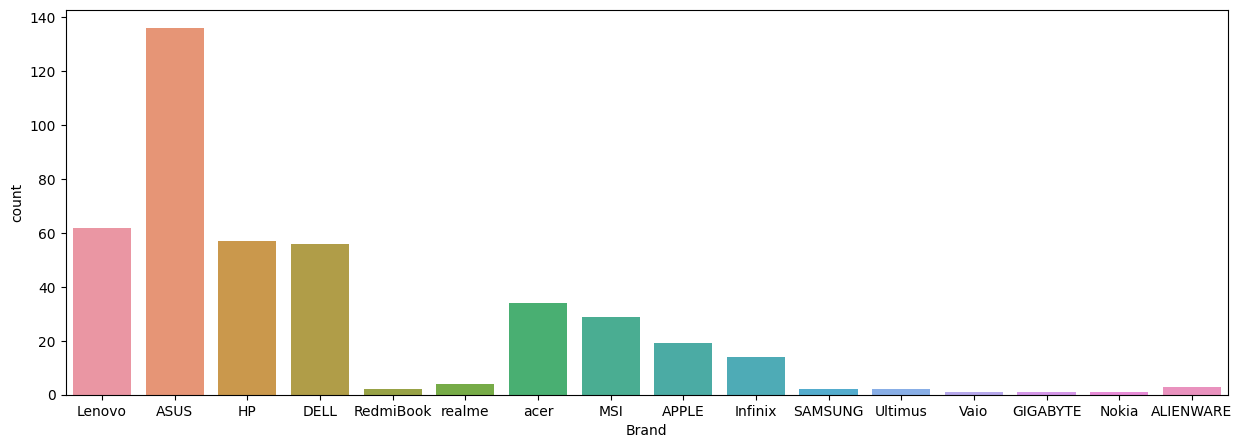

In [95]:
#Count Plot
plt.figure(figsize=(15,5),dpi=100)
sns.countplot(x=Flipkart.Brand)

### Observation - 
>- The above plot show us the count for each product. 
>- We can see that **`ASUS`** is having highest number of product listing on Flipkart website.

In [96]:
Flipkart.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})


MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  253390.000000
APPLE       88990  309490  162332.105263
ASUS        14990  361990   91455.632353
DELL        30428  434830   74613.232143
GIGABYTE    73990   73990   73990.000000
HP          25990  199990   65943.157895
Infinix     20990   52990   37347.142857
Lenovo      19490  157990   54473.032258
MSI         43990  389990  123411.344828
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   35990.000000
SAMSUNG     32990   59990   46490.000000
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        24990  155490   65000.764706
realme      46990   64999   54742.250000

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\1575854810.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = Flipkart,x='MRP', y='Processor', orient='h', ci=False)


<Axes: xlabel='MRP', ylabel='Processor'>

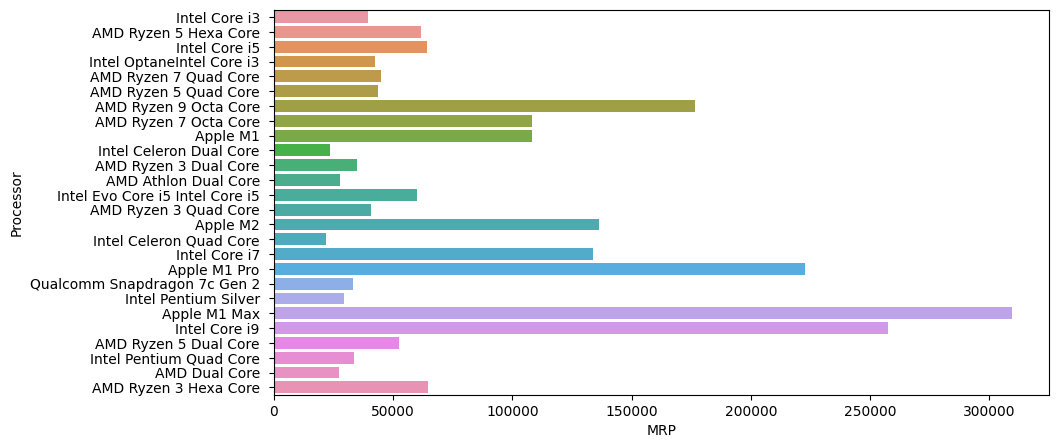

In [97]:
#Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(data = Flipkart,x='MRP', y='Processor', orient='h', ci=False)

### Observations:
>- **`Apple M1 Max`** having the highest Price compared to all Processors.
>- **`Intel Celeron Quad Core`** having the least Price compared to all Processors.
>- We can says that if the Processors increased then Price also increased.

<Axes: xlabel='Brand', ylabel='MRP'>

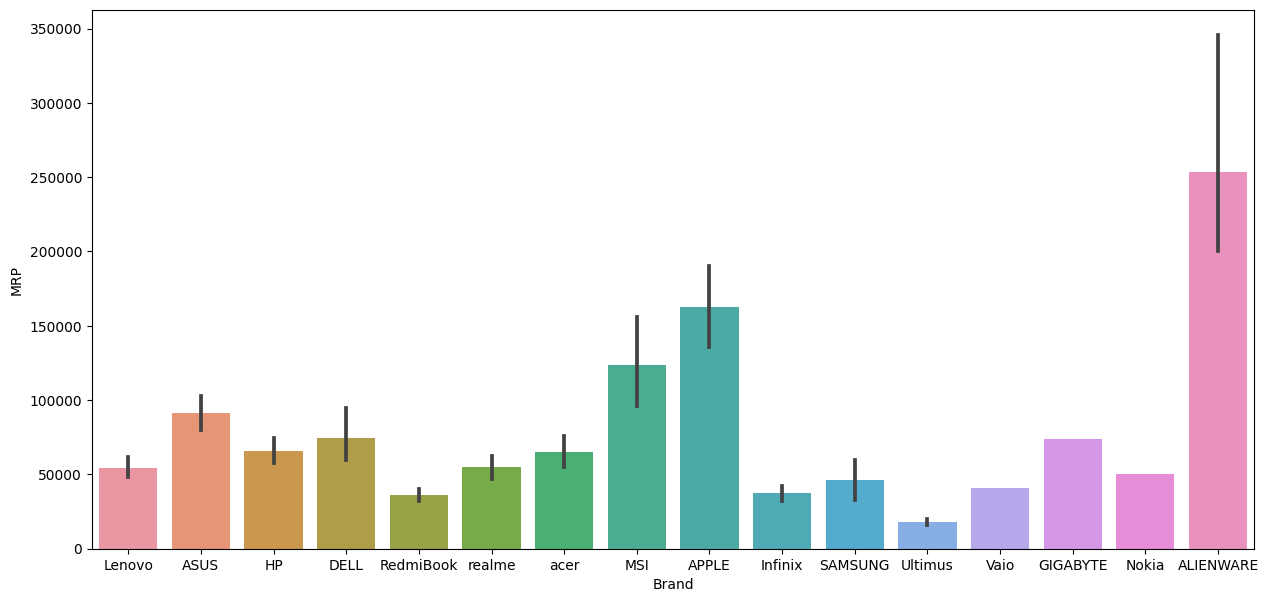

In [98]:
#Bar Plot
plt.figure(figsize=(15, 7))
sns.barplot(x = Flipkart.Brand, y = Flipkart.MRP)

### Observations:
>- **`AlienWare`** having the highest outliers when compared to others.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\1797938709.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='MRP',y='Storage',data=Flipkart,hue='RAM Size',ci=False);


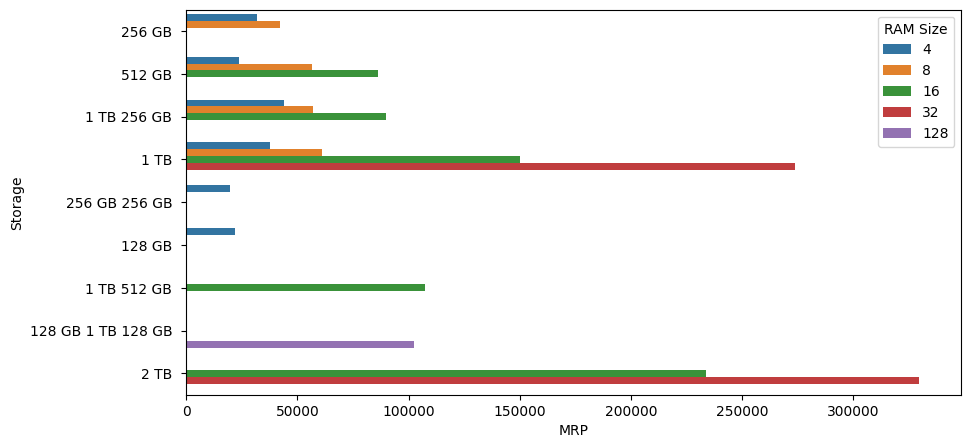

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(x='MRP',y='Storage',data=Flipkart,hue='RAM Size',ci=False);

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\2929889598.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='MRP',y='Storage',data=Flipkart,hue='Storage Type',ci=False);


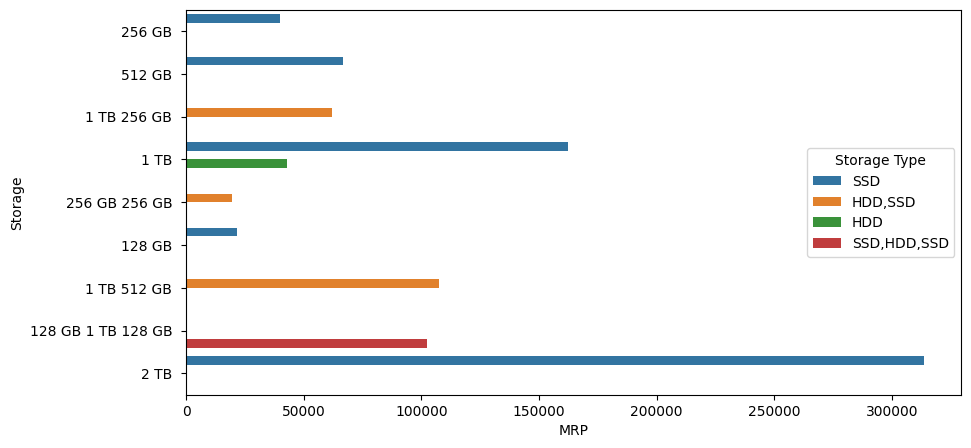

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x='MRP',y='Storage',data=Flipkart,hue='Storage Type',ci=False);

### Observations:
>- In the above two plots we can say that 2 TB SSD having the highest Storage Type.
>- 32 GB Ram Size is the highest size

<Axes: xlabel='MRP', ylabel='Rating'>

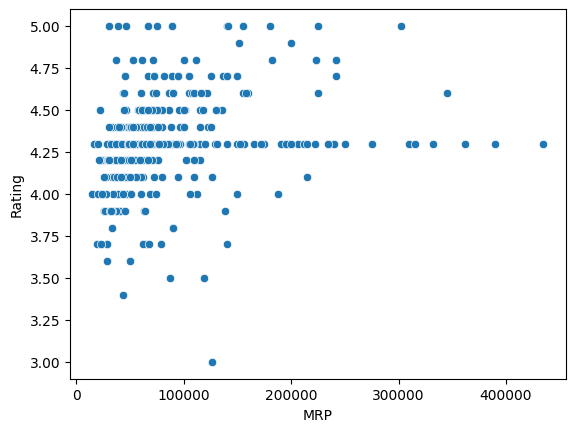

In [101]:
#Scatter Plot
sns.scatterplot(data=Flipkart,x='MRP',y='Rating')

### Observations:
>- More rated laptops above 4 are more Under 2 lakhs.
>- Maximum purchasing of laptops are under 2 lakhs.
>- As Price increasing then the rating is constant with 4.25.


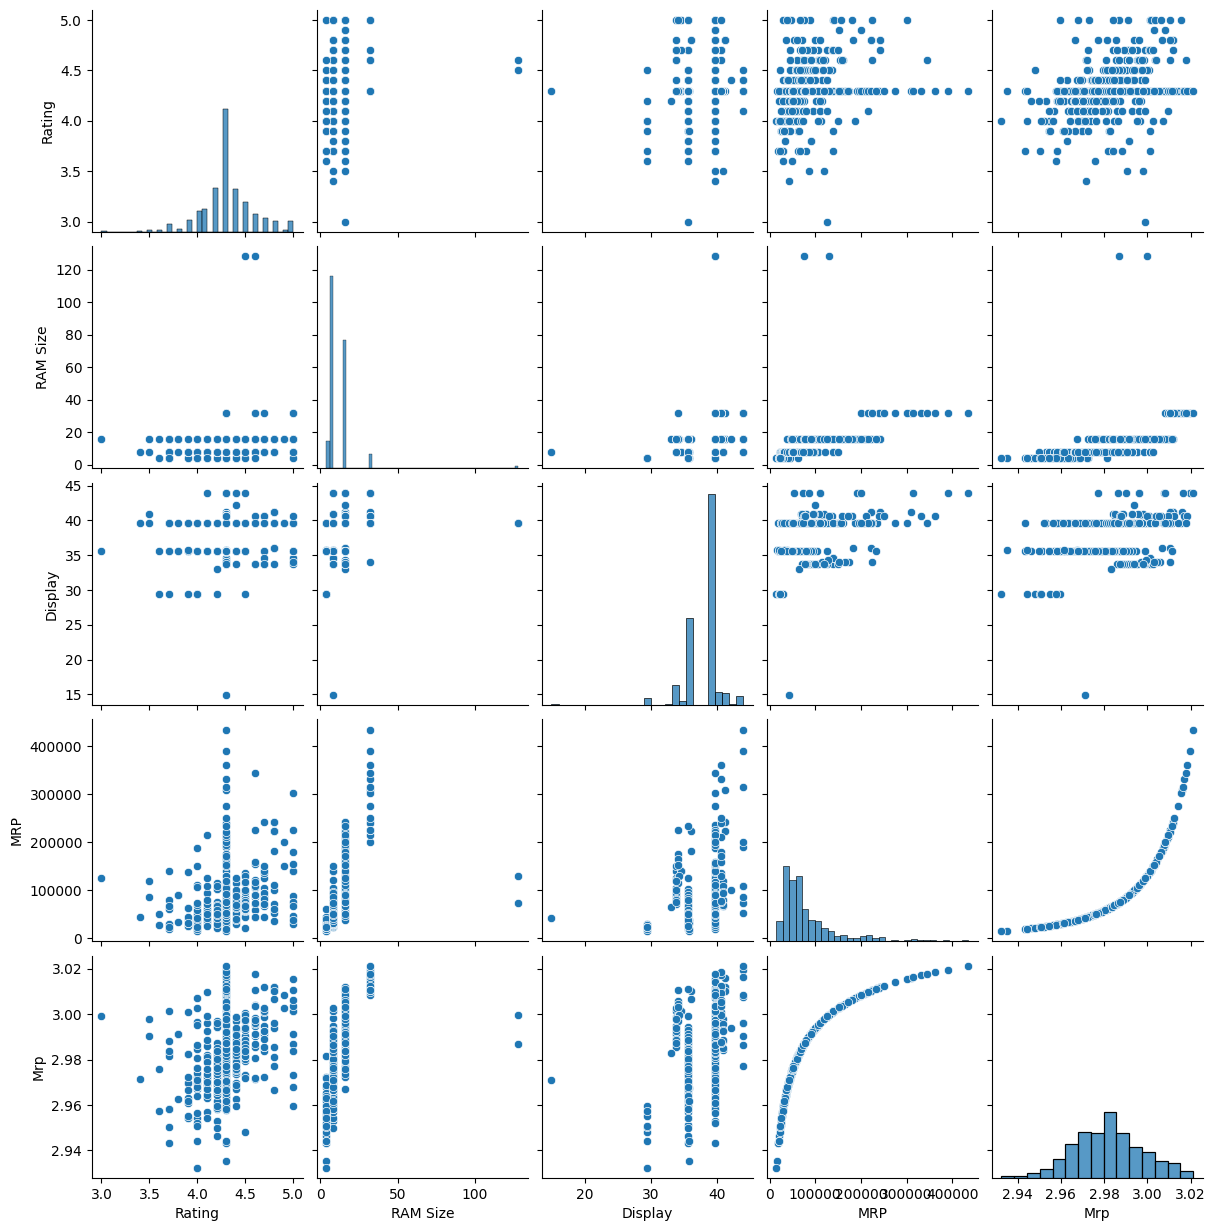

In [102]:
sns.pairplot(Flipkart) #PAIR PLOT IS USED ONLY TO THE FEW NUMERICALS VALUES ARE TO BE ANALYSED
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8800\2396261422.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Flipkart.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG",linewidths=0.01,square=True)


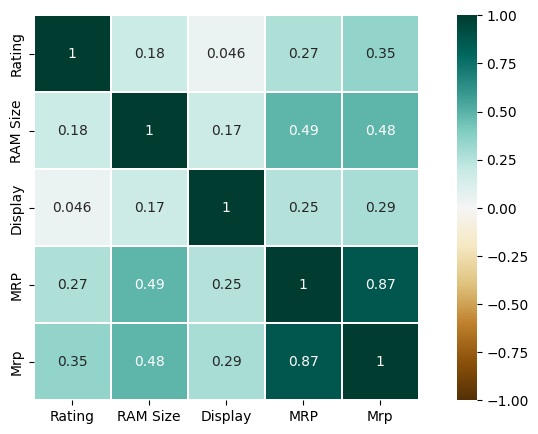

In [103]:
#Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(Flipkart.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG",linewidths=0.01,square=True)
plt.show()

# MoDel Building

###  Identify the Target Variable and Splitting the Data into Train and Test

In [104]:
import sklearn

print(sklearn.__version__)

1.2.1


In [105]:
Flipkart.head()

,Brand,Processor,Operating System,Rating,RAM Size,RAM Type,Storage,Storage Type,Display,MRP,Mrp
0,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,256 GB,SSD,35.56,36990,2.966419
1,Lenovo,Intel Core i3,64 bit Windows 11,4.2,8,DDR4,512 GB,SSD,39.62,39990,2.968910
2,ASUS,Intel Core i3,64 bit Windows 11,4.3,8,DDR4,512 GB,SSD,39.62,32990,2.962647
3,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,4.4,8,DDR4,512 GB,SSD,39.62,49990,2.975699
4,ASUS,Intel Core i5,64 bit Windows 11,4.4,8,DDR4,512 GB,SSD,39.62,49990,2.975699


In [216]:
# Identifying the inputs (X) and output (y)

y = Flipkart['MRP']

X = Flipkart[['Processor', 'Operating System', 'RAM Size', 'RAM Type', 'Storage', 'Storage Type', 'Display']]

In [217]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [218]:
X_train.head()

,Processor,Operating System,RAM Size,RAM Type,Storage,Storage Type,Display
603,Intel Core i7,64 bit Windows 11,16,DDR5,1 TB,SSD,39.62
82,AMD Ryzen 9 Octa Core,64 bit Windows 11,16,DDR4,1 TB,SSD,39.62
249,Intel Core i3,64 bit Windows 11,8,DDR4,256 GB,SSD,35.56
623,Intel Core i5,64 bit Windows 10,16,DDR4,512 GB,SSD,35.56
229,Apple M1,Mac OS,8,DDR4,256 GB,SSD,33.78


In [219]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(296, 7) (296,)
(127, 7) (127,)


### Separating Categorical and Numerical Columns:

In [220]:
X_train.head()

,Processor,Operating System,RAM Size,RAM Type,Storage,Storage Type,Display
603,Intel Core i7,64 bit Windows 11,16,DDR5,1 TB,SSD,39.62
82,AMD Ryzen 9 Octa Core,64 bit Windows 11,16,DDR4,1 TB,SSD,39.62
249,Intel Core i3,64 bit Windows 11,8,DDR4,256 GB,SSD,35.56
623,Intel Core i5,64 bit Windows 10,16,DDR4,512 GB,SSD,35.56
229,Apple M1,Mac OS,8,DDR4,256 GB,SSD,33.78


In [221]:
X_train.dtypes

Processor            object
Operating System     object
RAM Size              int64
RAM Type             object
Storage              object
Storage Type         object
Display             float64
dtype: object

In [222]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,Processor,Operating System,RAM Type,Storage,Storage Type
603,Intel Core i7,64 bit Windows 11,DDR5,1 TB,SSD
82,AMD Ryzen 9 Octa Core,64 bit Windows 11,DDR4,1 TB,SSD
249,Intel Core i3,64 bit Windows 11,DDR4,256 GB,SSD
623,Intel Core i5,64 bit Windows 10,DDR4,512 GB,SSD
229,Apple M1,Mac OS,DDR4,256 GB,SSD


In [223]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,RAM Size,Display
603,16,39.62
82,16,39.62
249,8,35.56
623,16,35.56
229,8,33.78


### Scaling the Numerical Features

In [202]:
X_train_num.head()

,RAM Size,Display
603,16,39.62
82,16,39.62
249,8,35.56
623,16,35.56
229,8,33.78


In [225]:
X_train_num

,RAM Size,Display
603,16,39.62
82,16,39.62
249,8,35.56
623,16,35.56
229,8,33.78
...,...,...
575,4,39.62
608,8,35.56
538,4,39.62
453,16,39.62


###  Applying Label Encoding on Categorical Columns

In [226]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
603
82
249
623
229


In [227]:
X_train_cat.Processor.unique()

array(['Intel Core i7 ', 'AMD Ryzen 9 Octa Core ', 'Intel Core i3 ',
       'Intel Core i5 ', 'Apple M1 ', 'Apple M1 Pro ',
       'AMD Ryzen 3 Dual Core ', 'Intel Celeron Dual Core ',
       'AMD Athlon Dual Core ', 'AMD Ryzen 5 Hexa Core ',
       'AMD Ryzen 5 Dual Core ', 'AMD Ryzen 5 Quad Core ',
       'Intel Core i9 ', 'AMD Ryzen 7 Octa Core ',
       'Qualcomm Snapdragon 7c Gen 2 ', 'Apple M1 Max ', 'Apple M2 ',
       'Intel OptaneIntel Core i3 ', 'AMD Ryzen 7 Quad Core ',
       'Intel Pentium Quad Core ', 'AMD Ryzen 3 Quad Core ',
       'Intel Pentium Silver ', 'AMD Dual Core '], dtype=object)

In [228]:
#processor
cut_encoder = {'Intel Core i7 ': 6, 'AMD Ryzen 9 Octa Core ': 4, 'Intel Core i3 ': 13,
       'Intel Core i5 ': 9, 'Apple M1 ': 8, 'Apple M1 Pro ': 3,
       'AMD Ryzen 3 Dual Core ':7, 'Intel Celeron Dual Core ': 23,
       'AMD Athlon Dual Core ': 17, 'AMD Ryzen 5 Hexa Core ': 10,
       'AMD Ryzen 5 Dual Core ': 11, 'AMD Ryzen 5 Quad Core ': 12,
       'Intel Core i9 ': 2, 'AMD Ryzen 7 Octa Core ': 16,
       'Qualcomm Snapdragon 7c Gen 2 ': 15, 'Apple M1 Max ': 1, 'Apple M2 ': 5,
       'Intel OptaneIntel Core i3 ': 18, 'AMD Ryzen 7 Quad Core ': 14,
       'Intel Pentium Quad Core ': 19, 'AMD Ryzen 3 Quad Core ': 20,
       'Intel Pentium Silver ': 21, 'AMD Dual Core ': 22,'Intel Evo Core i5 Intel Core i5 ': 24,
               'Intel Celeron Quad Core ': 25,'AMD Ryzen 3 Hexa Core ':26}

X_train_cat_le['Processor'] = X_train_cat['Processor'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,Processor
603,6
82,4
249,13
623,9
229,8


In [229]:
X_train_cat['Operating System'].unique()

array(['64 bit Windows 11 ', '64 bit Windows 10 ', 'Mac OS ',
       '64 bit DOS ', '64 bit Chrome', '64 bit Windows 11',
       '32 bit Windows 11 ', '64 bit Chrome ', '64 bit DOS',
       '64 bit Windows 10'], dtype=object)

In [230]:
Operating_encoder = {'64 bit Windows 11 ': 1, '64 bit Windows 10 ': 3, 'Mac OS ': 10,
       '64 bit DOS ': 8, '64 bit Chrome': 6, '64 bit Windows 11': 2 ,
       '32 bit Windows 11 ': 5, '64 bit Chrome ': 7, '64 bit DOS':9,
       '64 bit Windows 10': 4}

X_train_cat_le['Operating System'] = X_train_cat['Operating System'].apply(lambda x : Operating_encoder[x])

X_train_cat_le.head()

,Processor,Operating System
603,6,1
82,4,1
249,13,1
623,9,3
229,8,10


In [231]:
X_train_cat['RAM Type'].unique()

array(['  DDR5', '  DDR4', '  Unified', '  LPDDR4X', '  LPDDR4',
       '  LPDDR5'], dtype=object)

In [232]:
Type_encoder = {'  DDR5': 1, '  DDR4': 2, '  Unified': 3, '  LPDDR4X': 4, '  LPDDR4': 5,
       '  LPDDR5': 6,'  SSD':7,'  LPDDR3': 8}

X_train_cat_le['RAM Type'] = X_train_cat['RAM Type'].apply(lambda x : Type_encoder[x])

X_train_cat_le.head()

,Processor,Operating System,RAM Type
603,6,1,1
82,4,1,2
249,13,1,2
623,9,3,2
229,8,10,2


In [233]:
X_train_cat['Storage Type'].unique()

array(['SSD', 'HDD,SSD', 'HDD'], dtype=object)

In [234]:
storagetype_encoder = {'SSD': 1, 'HDD,SSD': 3, 'HDD': 2,'SSD,HDD,SSD': 4}

X_train_cat_le['Storage Type'] = X_train_cat['Storage Type'].apply(lambda x : storagetype_encoder[x])

X_train_cat_le.head()

,Processor,Operating System,RAM Type,Storage Type
603,6,1,1,1
82,4,1,2,1
249,13,1,2,1
623,9,3,2,1
229,8,10,2,1


In [235]:
X_train_cat['Storage'].unique()

array(['1 TB ', '256 GB ', '512 GB ', '1 TB 256 GB ', '2 TB ', '128 GB ',
       '1 TB 512 GB ', '256 GB 256 GB '], dtype=object)

In [236]:
storage_encoder = {'1 TB ': 1, '256 GB ': 2, '512 GB ': 3, '1 TB 256 GB ': 4, '2 TB ': 5, '128 GB ': 6,
       '1 TB 512 GB ': 7, '256 GB 256 GB ': 8,'128 GB 1 TB 128 GB ': 9}

X_train_cat_le['Storage'] = X_train_cat['Storage'].apply(lambda x : storage_encoder[x])

X_train_cat_le.head()

,Processor,Operating System,RAM Type,Storage Type,Storage
603,6,1,1,1,1
82,4,1,2,1,1
249,13,1,2,1,2
623,9,3,2,1,3
229,8,10,2,1,2


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [237]:
X_train_transformed = pd.concat([X_train_num, X_train_cat_le], axis=1)

X_train_transformed.head()

,RAM Size,Display,Processor,Operating System,RAM Type,Storage Type,Storage
603,16,39.62,6,1,1,1,1
82,16,39.62,4,1,2,1,1
249,8,35.56,13,1,2,1,2
623,16,35.56,9,3,2,1,3
229,8,33.78,8,10,2,1,2


### Preparing Test Data

In [238]:
X_test.head()

,Processor,Operating System,RAM Size,RAM Type,Storage,Storage Type,Display
203,Intel Core i5,64 bit Windows 11,16,LPDDR4X,512 GB,SSD,35.56
644,Intel Core i5,64 bit Windows 10,128,SSD,128 GB 1 TB 128 GB,"SSD,HDD,SSD",39.62
394,AMD Ryzen 7 Octa Core,64 bit Windows 10,8,DDR4,512 GB,SSD,35.56
233,Apple M2,Mac OS,8,Unified,256 GB,SSD,33.78
23,AMD Ryzen 3 Dual Core,64 bit Windows 11,8,DDR4,512 GB,SSD,39.62


In [239]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 203 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         127 non-null    object 
 1   Operating System  127 non-null    object 
 2   RAM Size          127 non-null    int64  
 3   RAM Type          127 non-null    object 
 4   Storage           127 non-null    object 
 5   Storage Type      127 non-null    object 
 6   Display           127 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 7.9+ KB


In [240]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,Processor,Operating System,RAM Type,Storage,Storage Type
203,Intel Core i5,64 bit Windows 11,LPDDR4X,512 GB,SSD
644,Intel Core i5,64 bit Windows 10,SSD,128 GB 1 TB 128 GB,"SSD,HDD,SSD"
394,AMD Ryzen 7 Octa Core,64 bit Windows 10,DDR4,512 GB,SSD
233,Apple M2,Mac OS,Unified,256 GB,SSD
23,AMD Ryzen 3 Dual Core,64 bit Windows 11,DDR4,512 GB,SSD


In [241]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,RAM Size,Display
203,16,35.56
644,128,39.62
394,8,35.56
233,8,33.78
23,8,39.62


In [242]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
203
644
394
233
23


In [243]:
X_test_cat['RAM Type'].unique()

array(['  LPDDR4X', '  SSD', '  DDR4', '  Unified', '  DDR5', '  LPDDR5',
       '  LPDDR3', '  LPDDR4'], dtype=object)

In [244]:
X_test_cat_le['Processor'] = X_test_cat['Processor'].apply(lambda x : cut_encoder[x])

X_test_cat_le['Operating System'] = X_test_cat['Operating System'].apply(lambda x : Operating_encoder[x])

X_test_cat_le['RAM Type'] = X_test_cat['RAM Type'].apply(lambda x : Type_encoder[x])

X_test_cat_le['Storage Type'] = X_test_cat['Storage Type'].apply(lambda x : storagetype_encoder[x])

X_test_cat_le['Storage'] = X_test_cat['Storage'].apply(lambda x : storage_encoder[x])
X_test_cat_le.head()

,Processor,Operating System,RAM Type,Storage Type,Storage
203,9,2,4,1,3
644,9,3,7,4,9
394,16,3,2,1,3
233,5,10,3,1,2
23,7,1,2,1,3


In [249]:
X_test_transformed = pd.concat([X_test_num, X_test_cat_le], axis=1)

X_test_transformed.head()

,RAM Size,Display,Processor,Operating System,RAM Type,Storage Type,Storage
203,16,35.56,9,2,4,1,3
644,128,39.62,9,3,7,4,9
394,8,35.56,16,3,2,1,3
233,8,33.78,5,10,3,1,2
23,8,39.62,7,1,2,1,3


## Building the Model - RandomForest

In [257]:
X_train_transformed


,RAM Size,Display,Processor,Operating System,RAM Type,Storage Type,Storage
603,16,39.62,6,1,1,1,1
82,16,39.62,4,1,2,1,1
249,8,35.56,13,1,2,1,2
623,16,35.56,9,3,2,1,3
229,8,33.78,8,10,2,1,2
...,...,...,...,...,...,...,...
575,4,39.62,22,3,2,2,1
608,8,35.56,9,3,2,1,3
538,4,39.62,13,3,2,2,1
453,16,39.62,6,2,2,1,3


In [258]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Running the random forest with default parameters.
model_rf = RandomForestRegressor()

# Fit the random forest model
model_rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [259]:
predictions = model_rf.predict(X_test_transformed)

In [260]:
from sklearn.metrics import mean_absolute_error,r2_score

print('Mean Absolute Error')
print(mean_absolute_error(y_test,predictions))
print()

print('R2_Score')
print(r2_score(y_test,predictions))
print()

print()

Mean Absolute Error
14269.915369463703

R2_Score
0.8424072352121642




## Tuning n_estimators

In [261]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1300, 200)}]

rf = RandomForestRegressor()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring='r2',
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': range(10, 1300, 200)}],
             return_train_score=True, scoring='r2', verbose=1)

In [262]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_estimators': 10}
RandomForestRegressor(n_estimators=10)

Score on Test Data:  0.8666233881878163


In [263]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059236,0.027130,0.013016,0.005243,10,{'n_estimators': 10},0.764980,0.817401,0.754603,0.734855,...,0.779818,0.036166,1,0.943539,0.942263,0.950018,0.945422,0.942594,0.944767,0.002846
1,0.747173,0.140147,0.047063,0.032988,210,{'n_estimators': 210},0.787175,0.834630,0.725757,0.732157,...,0.779006,0.043610,2,0.945113,0.958563,0.956970,0.954486,0.946988,0.952424,0.005396
2,1.372727,0.189227,0.063097,0.013836,410,{'n_estimators': 410},0.789827,0.827641,0.721965,0.723488,...,0.774687,0.044086,7,0.945539,0.958343,0.958080,0.954301,0.949136,0.953080,0.005032
3,1.941300,0.179272,0.106782,0.041198,610,{'n_estimators': 610},0.791744,0.821088,0.731131,0.727026,...,0.777335,0.040641,5,0.946185,0.956198,0.957807,0.954367,0.948809,0.952673,0.004442
4,2.743022,0.376279,0.133271,0.049704,810,{'n_estimators': 810},0.792337,0.816458,0.729042,0.736494,...,0.776973,0.037034,6,0.946164,0.956340,0.957436,0.955715,0.948737,0.952878,0.004540


## Building the Model - KNN

In [264]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

In [265]:
from sklearn.neighbors import KNeighborsRegressor

In [266]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [267]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_neighbors': 7, 'p': 1}
KNeighborsRegressor(n_neighbors=7, p=1)

Score on Test Data:  0.6769648862071767


## Building the Model - GBDT

In [268]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

In [269]:
model_gbdt = GradientBoostingRegressor()

model_gbdt.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [270]:
predictions = model_gbdt.predict(X_test_transformed)

In [271]:
from sklearn.metrics import mean_absolute_error,r2_score

print('Mean Absolute Error')
print(mean_absolute_error(y_test,predictions))
print()

print('R2_Score')
print(r2_score(y_test,predictions))
print()

print()

Mean Absolute Error
14406.404451995097

R2_Score
0.7984004720278788




In [272]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1300, 200)}]

model_gbdt = GradientBoostingRegressor() 

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=model_gbdt, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring='r2',
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'n_estimators': range(10, 1300, 200)}],
             return_train_score=True, scoring='r2', verbose=1)

In [273]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_neighbors': 7, 'p': 1}
KNeighborsRegressor(n_neighbors=7, p=1)

Score on Test Data:  0.6769648862071767


## PICKLE

In [274]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [275]:
step1 = ColumnTransformer(transformers=[('abc',StandardScaler(),[0,1])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=10)
pipe = Pipeline([('step1',step1),('step2',step2)])

In [276]:
pipe.fit(X_train_transformed,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('abc', StandardScaler(),
                                                  [0, 1])])),
                ('step2', RandomForestRegressor(n_estimators=10))])

In [277]:
import pickle
file = open('Flipkart.pkl','wb')
pickle.dump(pipe,file)

In [278]:
X_train_transformed

,RAM Size,Display,Processor,Operating System,RAM Type,Storage Type,Storage
603,16,39.62,6,1,1,1,1
82,16,39.62,4,1,2,1,1
249,8,35.56,13,1,2,1,2
623,16,35.56,9,3,2,1,3
229,8,33.78,8,10,2,1,2
...,...,...,...,...,...,...,...
575,4,39.62,22,3,2,2,1
608,8,35.56,9,3,2,1,3
538,4,39.62,13,3,2,2,1
453,16,39.62,6,2,2,1,3
